In [23]:
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
import string

In [24]:
datasett = fetch_20newsgroups()
stopwords = set(stopwords.words('english'))
stopwords.update(list(string.punctuation))

In [53]:
x = datasett.data
y = datasett.target
x = np.array(x)
x_modified = [word_tokenize(i) for i in x]

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x_modified, y)

In [61]:
useful_words = []
for current in x_train:
    for word in current:
        if word.lower() not in stopwords and len(word) != 1 and len(word) != 2 and word[0] != "'" and word[0] != "." and word[0] != "n't":
            useful_words.append(word)
def freq_dict(words):
    dic = dict()
    for word in words:
        if word in dic.keys():
            dic[word] += 1
        else:
            dic[word] = 1
    return dic
dic = freq_dict(useful_words)          

In [62]:
freq = np.array([i for i in dic.values()])
words = np.array([i for i in dic.keys()])
freq = np.sort(freq)[::-1]
words = words[np.argsort(freq)][::-1]

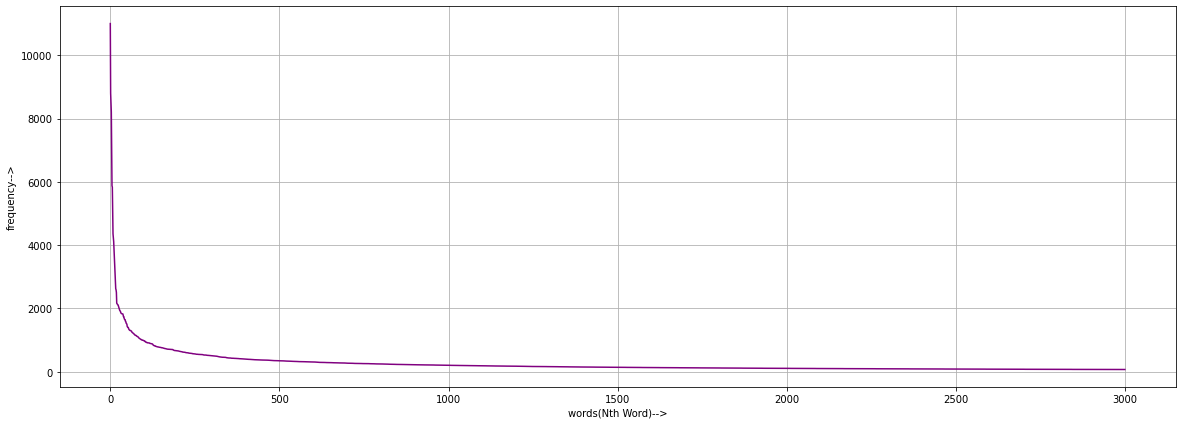

In [63]:
import matplotlib.pyplot as plt
low = 0
high = 3000
difference = 50
plt.figure(figsize = (20, 7))
plt.plot(np.arange(len(freq))[low:high], freq[low:high], color = "purple")
plt.xlabel('words(Nth Word)-->')
plt.ylabel('frequency-->')
plt.grid()
plt.show()

In [68]:
def data_modifier(x_data, features):
    modified_data = np.zeros((len(x_data), len(features)))
    for i in range(len(x_data)):
        current = x_data[i]
        d = dict()
        for word in current:
            if word in d.keys():
                d[word] += 1
            else:
                d[word] = 1
        for j in range(len(features)):
            if features[j] in dic.keys():
                modified_data[i][j] = d[features[j]]
    return modified_data

In [69]:
features = words[20:100000]
x_train_modified = data_modifier(x_train, features)
x_test_modified = data_modifier(x_test, features)

MemoryError: Unable to allocate 6.32 GiB for an array with shape (8485, 99980) and data type float64